<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(1_6)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n20.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.241940,44.406076,-15.134610,83.513405,89.187740,-5.674335
1,0.0,1.0,51.194901,57.340688,-45.037809,73.497780,111.005892,-37.508112
2,0.0,2.0,72.088535,86.213313,53.639600,221.941448,164.996212,56.945236
3,0.0,3.0,26.740021,46.347347,31.034046,114.121415,74.211494,39.909921
4,0.0,4.0,77.479384,38.287210,-1.783136,123.983458,114.812695,9.170763
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.569827,70.535775,45.194662,175.300264,132.011461,43.288803
29996,999.0,26.0,77.474783,96.321288,-31.246722,152.549349,176.435209,-23.885861
29997,999.0,27.0,85.664954,71.307053,19.722150,186.694158,165.012807,21.681351
29998,999.0,28.0,67.587305,49.760528,12.781646,140.129479,132.598780,7.530699


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.241940,44.406076,-15.134610,83.513405,89.187740,-5.674335
1,0.0,1.0,51.194901,57.340688,-45.037809,73.497780,111.005892,-37.508112
2,0.0,2.0,72.088535,86.213313,53.639600,221.941448,164.996212,56.945236
3,0.0,3.0,26.740021,46.347347,31.034046,114.121415,74.211494,39.909921
4,0.0,4.0,77.479384,38.287210,-1.783136,123.983458,114.812695,9.170763
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.569827,70.535775,45.194662,175.300264,132.011461,43.288803
29996,999.0,26.0,77.474783,96.321288,-31.246722,152.549349,176.435209,-23.885861
29997,999.0,27.0,85.664954,71.307053,19.722150,186.694158,165.012807,21.681351
29998,999.0,28.0,67.587305,49.760528,12.781646,140.129479,132.598780,7.530699


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    44.241940  44.406076 -15.134610   83.513405   89.187740   
      1.0    51.194901  57.340688 -45.037809   73.497780  111.005892   
      2.0    72.088535  86.213313  53.639600  221.941448  164.996212   
      3.0    26.740021  46.347347  31.034046  114.121415   74.211494   
      4.0    77.479384  38.287210  -1.783136  123.983458  114.812695   
...                ...        ...        ...         ...         ...   
999.0 25.0   49.569827  70.535775  45.194662  175.300264  132.011461   
      26.0   77.474783  96.321288 -31.246722  152.549349  176.435209   
      27.0   85.664954  71.307053  19.722150  186.694158  165.012807   
      28.0   67.587305  49.760528  12.781646  140.129479  132.598780   
      29.0   92.385298  62.958635  13.511294  178.855227  164.781838   

                 e_hat  
rep   index             
0.0   0.0    -5.674335  
      1.0   -37.508112  
      2.0    56.945236  
      3.0    39.909921  
      4.0     9.170763  
...                ...  
999.0 25.0   43.288803  
      26.0  -23.885861  
      27.0   21.681351  
      28.0    7.530699  
      29.0   14.073390  

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    44.241940  44.406076 -15.134610   83.513405   89.187740   
      1.0    51.194901  57.340688 -45.037809   73.497780  111.005892   
      2.0    72.088535  86.213313  53.639600  221.941448  164.996212   
      3.0    26.740021  46.347347  31.034046  114.121415   74.211494   
      4.0    77.479384  38.287210  -1.783136  123.983458  114.812695   
...                ...        ...        ...         ...         ...   
999.0 25.0   49.569827  70.535775  45.194662  175.300264  132.011461   
      26.0   77.474783  96.321288 -31.246722  152.549349  176.435209   
      27.0   85.664954  71.307053  19.722150  186.694158  165.012807   
      28.0   67.587305  49.760528  12.781646  140.129479  132.598780   
      29.0   92.385298  62.958635  13.511294  178.855227  164.781838   

                 e_hat  
rep   index             
0.0   0.0    -5.674335  
      1.0   -37.508112  
      2.0    56.945236  
      3.0    39.909921  
      4.0     9.170763  
...                ...  
999.0 25.0   43.288803  
      26.0  -23.885861  
      27.0   21.681351  
      28.0    7.530699  
      29.0   14.073390  

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,44.241940,44.406076,-15.134610,83.513405,89.187740,-5.674335
1,0.0,1.0,51.194901,57.340688,-45.037809,73.497780,111.005892,-37.508112
2,0.0,2.0,72.088535,86.213313,53.639600,221.941448,164.996212,56.945236
3,0.0,3.0,26.740021,46.347347,31.034046,114.121415,74.211494,39.909921
4,0.0,4.0,77.479384,38.287210,-1.783136,123.983458,114.812695,9.170763
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.569827,70.535775,45.194662,175.300264,132.011461,43.288803
29996,999.0,26.0,77.474783,96.321288,-31.246722,152.549349,176.435209,-23.885861
29997,999.0,27.0,85.664954,71.307053,19.722150,186.694158,165.012807,21.681351
29998,999.0,28.0,67.587305,49.760528,12.781646,140.129479,132.598780,7.530699


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    44.241940  44.406076 -15.134610   83.513405   89.187740   
      1.0    51.194901  57.340688 -45.037809   73.497780  111.005892   
      2.0    72.088535  86.213313  53.639600  221.941448  164.996212   
      3.0    26.740021  46.347347  31.034046  114.121415   74.211494   
      4.0    77.479384  38.287210  -1.783136  123.983458  114.812695   
...                ...        ...        ...         ...         ...   
999.0 25.0   49.569827  70.535775  45.194662  175.300264  132.011461   
      26.0   77.474783  96.321288 -31.246722  152.549349  176.435209   
      27.0   85.664954  71.307053  19.722150  186.694158  165.012807   
      28.0   67.587305  49.760528  12.781646  140.129479  132.598780   
      29.0   92.385298  62.958635  13.511294  178.855227  164.781838   

                 e_hat  
rep   index             
0.0   0.0    -5.674335  
      1.0   -37.508112  
      2.0    56.945236  
      3.0    39.909921  
      4.0     9.170763  
...                ...  
999.0 25.0   43.288803  
      26.0  -23.885861  
      27.0   21.681351  
      28.0    7.530699  
      29.0   14.073390  

[30000 rows x 6 columns]

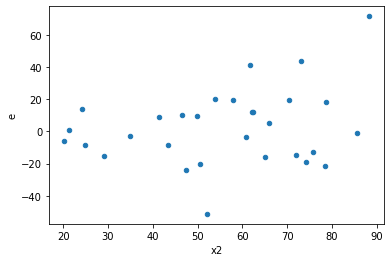

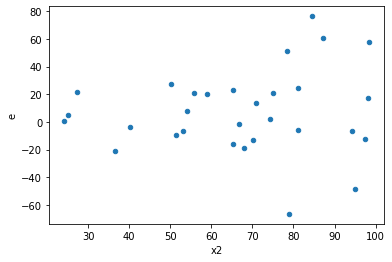

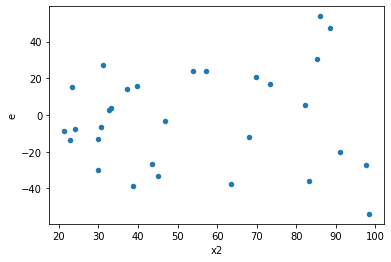

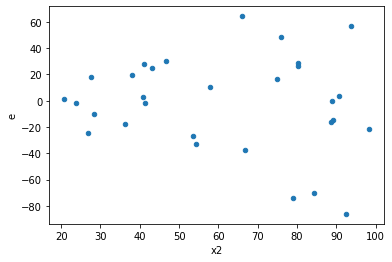

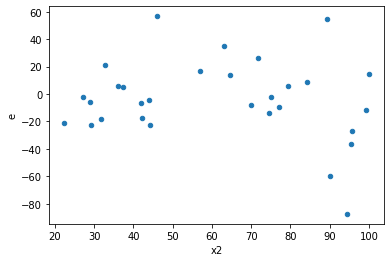

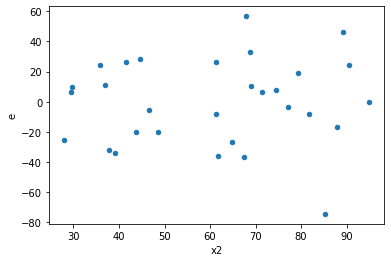

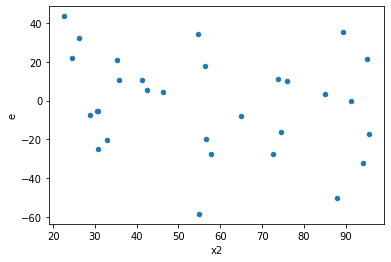

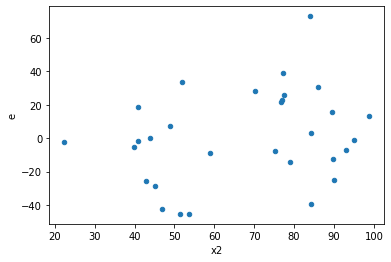

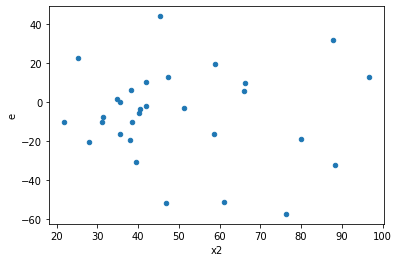

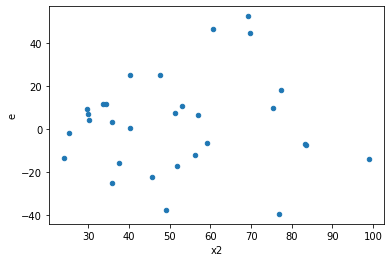

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,7991.678860841688,13751.021175108839,799.1678860841688,1375.102117510884,1.7206673859840977,0.4053915911057453,0.7973042044471274,0.20269579555287265,Reject005=1 : Homoscedasticity
1.0,10.0,10.0,5070.892919864902,17125.071517914996,507.0892919864902,1712.5071517914996,3.3771313629654083,0.06804559275915034,0.9659772036204248,0.03402279637957517,Reject005=1 : Homoscedasticity
2.0,10.0,10.0,2996.801842374901,7030.29648981148,299.6801842374901,703.029648981148,2.345933051162342,0.1948609342883607,0.9025695328558196,0.09743046714418035,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,5525.457748713383,9167.924930380468,552.5457748713383,916.7924930380468,1.6592154618348576,0.437240001892534,0.781379999053733,0.218620000946267,Reject005=1 : Homoscedasticity
4.0,10.0,10.0,3584.382432339885,26950.990088094266,358.4382432339885,2695.099008809427,7.519005183411934,0.003728337083559463,0.9981358314582203,0.0018641685417797316,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,7876.719584715746,12492.18368523248,787.6719584715746,1249.218368523248,1.5859627286304234,0.4788211111410865,0.7605894444294568,0.23941055557054325,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,747.6587466552703,7450.958504592297,74.76587466552704,745.0958504592297,9.965721043089431,0.0011599035638363286,0.9994200482180818,0.0005799517819181643,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,1377.4032762015104,2899.771768166871,137.74032762015105,289.9771768166871,2.105245296180523,0.25615986118437273,0.8719200694078136,0.12807993059218636,Reject005=1 : Homoscedasticity
10.0,10.0,10.0,2043.5695738966647,8199.53690044699,204.35695738966646,819.953690044699,4.012360041558149,0.038757137158830446,0.9806214314205848,0.019378568579415223,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,7991.678860841688,13751.021175108839,799.1678860841688,1375.102117510884,1.7206673859840977,0.4053915911057453,Reject005=1 : Homoscedasticity
1.0,10.0,10.0,5070.892919864902,17125.071517914996,507.0892919864902,1712.5071517914996,3.3771313629654083,0.06804559275915034,Reject005=1 : Homoscedasticity
2.0,10.0,10.0,2996.801842374901,7030.29648981148,299.6801842374901,703.029648981148,2.345933051162342,0.1948609342883607,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,5525.457748713383,9167.924930380468,552.5457748713383,916.7924930380468,1.6592154618348576,0.437240001892534,Reject005=1 : Homoscedasticity
4.0,10.0,10.0,3584.382432339885,26950.990088094266,358.4382432339885,2695.099008809427,7.519005183411934,0.003728337083559463,Reject005=0 : Heteroscedasticity
5.0,10.0,10.0,4187.569352654047,1391.1552458153913,418.7569352654047,139.11552458153912,0.3322106760891467,0.09687366619568615,Reject005=1 : Homoscedasticity
6.0,10.0,10.0,7876.719584715746,12492.18368523248,787.6719584715746,1249.218368523248,1.5859627286304234,0.4788211111410865,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,747.6587466552703,7450.958504592297,74.76587466552704,745.0958504592297,9.965721043089431,0.0011599035638363286,Reject005=0 : Heteroscedasticity
8.0,10.0,10.0,1377.4032762015104,2899.771768166871,137.74032762015105,289.9771768166871,2.105245296180523,0.25615986118437273,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      708
Reject005=0 : Heteroscedasticity    292
Name: Result_test, dtype: int64